<a href="https://colab.research.google.com/github/MoronSlayer/Deep-Learning-Projects/blob/learner/Copy_of_Team9_AAI695_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Assignment

In [ ]:
#  pip install pytorch_tabular[all]


Importing the libraries required to complete this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the given data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("/content/loan.csv")

Looking at the shape of the given dataframe.

In [ ]:
data.shape

So we have 39,717 rows and 111 columns.

Let us look at the head of the data given.

In [ ]:
data.head(10)

Setting the maximum number of rows and columns to display.

In [ ]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

Looking at the information regarding the given data frame.

In [ ]:
data.info(data.info(max_cols=200))

Looking at a brief description of the given data.

In [ ]:
data.describe()

So we see that there are many columns which have a majority of NAN and some columns that have only zeros.

Let us look at the percentage of zeros in each columns.

In [ ]:
def percentage_zero(x):
    count=0
    for i in range(len(x)):
        if(x[i]==0):
            count=count+1
        else:
            continue
    percentage=100*(count/len(x))
    return percentage
x=data.apply(percentage_zero,axis=0)
print(x)

Storing the column names that have more than 90% of zeros to a list.

In [ ]:
max_zeros_90=['delinq_2yrs','pub_rec','out_prncp','out_prncp_inv','total_rec_late_fee',
              'recoveries','collection_recovery_fee',
              'collections_12_mths_ex_med','acc_now_delinq']
data=data.drop(columns=max_zeros_90)
data.shape

So 9 columns were dropped which had more than 90% of zeros. The current number of columns is 102.

In [ ]:
y=round(100*(data.isnull().sum()/len(data.index)))
Missing_Percentage_DF=y.rename(None).to_frame()
Missing_Percentage_DF.reset_index(level=0, inplace=True)
Missing_Percentage_DF.columns=['Attribute','%Missing']
Missing_Percentage_DF

Saving the columns that have more than 90% of NAN values to a list and dropping these columns.

In [ ]:
max_nan_90=Missing_Percentage_DF.loc[Missing_Percentage_DF['%Missing']>90,'Attribute'].tolist()
data=data.drop(columns=max_nan_90)
data.shape

So we are left with 46 columns. Let us see how our data looks like now. 

In [ ]:
data.head()

Let us look at the counts of unique values in each column.

In [ ]:
unique_count=data.apply(lambda x:len(x.unique()),axis=0)
print(unique_count)

Looking at the columns that have only 1 value and storing the value present in these columns to a variable and dropping these columns.

In [ ]:
data[unique_count[unique_count==1].index.tolist()].apply(lambda x:x.unique(),axis=0)

In [ ]:
pymnt_plan='n'
initial_list_status='f'
policy_code=1
application_type='INDIVIDUAL'
delinq_amnt=0
data=data.drop(columns=unique_count[unique_count==1].index.tolist())
data.shape

So we are left with 41 columns. Let us look at data we are left with.

In [ ]:
data.head(10)

Merging the id which is an unique value to represent each loan and member id which is a unique value for the individual who takes a loan.

In [ ]:
data['LoanID-MemberID']=data['id'].map(str) + "_" + data['member_id'].map(str)

In [ ]:
data.shape

In [ ]:
data.drop_duplicates(subset ="LoanID-MemberID", keep = "first", inplace = True) 

In [ ]:
data.shape

So there are no records with duplicate values of LoanID-MemberID.

In [ ]:
data=data.drop(columns=['id','member_id'])
data.shape

Setting LoanID-MemberID as the index of the dataframe data.

In [ ]:
data=data.set_index('LoanID-MemberID')
print(data.shape)
data.head()

So we are left with 39 variables.
Let us explore each variable in order to clean them.<br>
## Data cleaning along with univariate analysis of individual columns. 

__loan_amnt__:The listed amount of the loan applied for by the borrower. If at some point in time,the credit department reduces the loan amount,then it will be reflected in this value.
This is a numeric variable.

Checking the number of missing values:

In [ ]:
data.loan_amnt.isnull().sum(axis=0)

So there are no missing values.

In [ ]:
data.loan_amnt.describe()

Let us look at the box plot for the same.

Creating a user defined function for creating custom boxplot:

In [ ]:
def bplot(var,strTitle):
    sns.set_style("whitegrid")
    sns.boxplot(y=var)
    plt.title(strTitle)
    plt.show()

In [ ]:
bplot(data.loan_amnt,"Loan Amount")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.loan_amnt.describe(percentiles=np.arange(0,1,0.01))

So we see that after the 96% there is a drastic increase. So we cap the values above this to 25484.

In [ ]:
data.loc[data['loan_amnt']>25484,'loan_amnt']=25484

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.loan_amnt,"Loan Amount")

In [ ]:
data.loan_amnt.describe()

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__funded_amnt__: The total amount committed to that loan at that point in time. This is also a numerical variable.

Checking the number of missing values:

In [ ]:
data.funded_amnt.isnull().sum(axis=0)

So there are no missing values.

In [ ]:
data.funded_amnt.describe()

In [ ]:
bplot(data.funded_amnt,"Funded Amount")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.funded_amnt.describe(percentiles=np.arange(0,1,0.01))

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 28000 that is 97% percentile.

In [ ]:
data.loc[data['funded_amnt']>28000,'funded_amnt']=28000

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.funded_amnt,"Funded Amount")

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__funded_amnt_inv__: The total amount committed by investors for that loan at that point in time. This is also a numerical variable.

Checking the number of missing values:

In [ ]:
data.funded_amnt_inv.isnull().sum(axis=0)

So there are no missing values.

In [ ]:
data.funded_amnt_inv.describe()

In [ ]:
bplot(data.funded_amnt_inv,"Funded Amount Investors")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.funded_amnt_inv.describe(percentiles=np.arange(0,1,0.01))

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 27013.537424 that is 97% percentile.

In [ ]:
data.loc[data['funded_amnt_inv']>27013.537424,'funded_amnt_inv']=27013.537424

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.funded_amnt_inv,"Funded Amount Investors")

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__term__: The number of payments on the loan. Values are in months and can be either 36 or 60. This is a categorical variable.

Checking the number of missing values:

In [ ]:
data.term.isnull().sum(axis=0)

So there are no missing values.

Unique values are:

In [ ]:
data.term.unique().tolist()

So there are not missing values.

Creating a user defined function to observe the counts of each level of the categorical variable.

In [ ]:
def cat_var_count(var_name):
  s = data[var_name].value_counts().head(10)
  print (s)
  plt.figure(figsize=(8,6))
  ax=s.plot.bar(width=.8) 
  for i, v in s.reset_index().iterrows():
    ax.text(i, v[var_name], v[var_name], color='black',ha="center",  va='bottom')
  plt.show()  


In [ ]:
cat_var_count('term')

So there are many more customers who have opted for the 36 months as compared to the 60 months.<br> <br>

__int_rate:__ Interest Rate on the loan.This is a numerical variable.

Checking the number of missing values:

In [ ]:
data.int_rate.isnull().sum(axis=0)

So there are no missing values.

In [ ]:
data['int_rate']

In [ ]:
data['int_rate'].dtype

So we need to remove '%' and convert the values into float.

In [ ]:
data['int_rate']=data['int_rate'].apply(lambda x: pd.Series(str(x).split('%')))[0].astype(float).tolist()

In [ ]:
data['int_rate'].dtype

Looking at a brief description of interest rate.

In [ ]:
data.int_rate.describe()

Looking at the box plot for int_rate.

In [ ]:
bplot(data.int_rate,"Interest Rate")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.int_rate.describe(percentiles=np.arange(0,1,0.01))

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 20.99 that is 99% percentile.

In [ ]:
data.loc[data['int_rate']>20.99,'int_rate']=20.99

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.int_rate,"Interest Rate")

So we notice that all the outliers are eliminated.<br><br>

__installment__: The monthly payment owed by the borrower if the loan originates. This is a numeric variable.

Checking the number of missing values:

In [ ]:
data.installment.isnull().sum(axis=0)

So there are no missing values.

Looking at a brief description of installment.

In [ ]:
data.installment.describe()

Looking at the box plot for int_rate.

In [ ]:
bplot(data.installment,"Installment")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.installment.describe(percentiles=np.arange(0,1,0.01))

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 805.08 that is 96% percentile.

In [ ]:
data.loc[data['installment']>805.08,'installment']=805.08

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.installment,"Installment")

So we notice that all the outliers are eliminated. Let us move on to the next variable.<br><br>
__grade:__ LC assigned loan grade. This is a categorical variable.

Checking the number of missing values:

In [ ]:
data.grade.isnull().sum(axis=0)

So there are no missing values. 

In [ ]:
cat_var_count('grade')

So we notice that the highest number of customers have a loan of grade B, then followed by grade A in second place and followed by grade C and so on.<br> Let us move on to the next variable.<br><br>
__sub_grade:__ LC assigned loan sub grade.

Checking the number of missing values:

In [ ]:
data.sub_grade.isnull().sum(axis=0)

So there are no missing values. 

Observing the value counts of the sub grade loan.

In [ ]:
cat_var_count('sub_grade')

In the previous plot we mentioned that the highest number of customers belong to grade B, in grade B we find that most of them belong to the sub-grade B3, the second highest grade of loan provided to the customers was A amongst the grade A loan customers, most of them had A4 type loan and finally the third highest loan grade was C and most of the customers who had a loan for this grade had a loan of sub grade C1. 

__emp_title:__ The job title supplied by the Borrower when applying for the loan.  Employer Title replaces Employer Name for all loans listed after 9/23/2013. <br>
Observing the column emp_title.

In [ ]:
data.emp_title

We shall drop this column as it does not make much sense from business point of view for this analysis.

In [ ]:
data=data.drop(columns='emp_title')

Exploring the next feature, emp_length.<br>
__emp_length:__ Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. This is a categorical variable.Looking at its unique values.

Let us look at the unique values of emp_length.

In [ ]:
data.emp_length.unique().tolist()

So there are NAN in this variable. Let us look at how many of them are NAN.

In [ ]:
data.emp_length.isnull().sum(axis=0)

Removing rows which contain NAN in emp_length.

In [ ]:
data=data.loc[data.emp_length.notnull()]
data.emp_length.isnull().sum(axis=0)

Creating lesser level by:<br>Assigning '< 1 year','2 years','3 years' as __LOW__.<br> Assigning '4 years','5 years','6 years' as __MODERATE__.<br> Assigning '7 years','8 years','9 years' as __HIGH__.<br> Assigning '10+ years' as __VERY HIGH__.

In [ ]:
def empLengthModify(a):
    if a== '< 1 year' or a== '2 years' or  a== '3 years':
        val="LOW"
    elif a== '4 years' or a== '5 years' or  a== '6 years':
        val="MODERATE"
    elif a=='7 years' or a=='8 years' or a=='9 years':
        val="HIGH"
    else:
        val="VERY HIGH"
    return val
data['emp_length']=data['emp_length'].apply(empLengthModify)

Observing the value counts of the newly created employee length levels.

In [ ]:
cat_var_count('emp_length')

__home_ownership:__ The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

Checking the number of missing values:

In [ ]:
data.home_ownership.isnull().sum(axis=0)

So there are no missing values. 

Observing the value counts of the subcategories.

In [ ]:
cat_var_count('home_ownership')

We notice that a highest number of customers who take loans are the ones who stay in a rented accommodation, followed by the people who have a mortgage.

__annual_inc__: The self-reported annual income provided by the borrower during registration.

In [ ]:
data.annual_inc.astype(int).isnull().sum(axis=0)

So there are no missing values.

Looking at a brief description of annual income.

In [ ]:
data.annual_inc.describe(percentiles=np.arange(0,1,0.1))

So let us bin the above annual income variable as follow:
1. LOW : People who are in the zero percentile to the thirty percentile range. i.e from 4.000000e+03 to 4.500000e+04<br>
2. MODERATE: People who are in the thirty percentile to the seventy percentile range. i.e. from 4.500000e+04 to 7.670000e+04.<br>
3. HIGH: People who are in the seventy to ninety percentile range. i.e from 7.670000e+04 to 1.170000e+05<br>
4. VERY_HIGH: People whose annual income is more than ninety percentile i.e greater than 1.170000e+05. These customers  are the outliers.

In [ ]:
def ann_inc_bin(a):
    if a>=4.000000e+03 and a<4.500000e+04:
        val='LOW'
    elif a>=4.500000e+04 and a<7.670000e+04:
        val='MODERATE'
    elif a>=7.670000e+04 and a<=1.170000e+05:
        val='HIGH'
    else:
        val="VERY_HIGH"
    return val
data.annual_inc=data.annual_inc.apply(ann_inc_bin)

Observing the value counts of the annual income bins created above.

In [ ]:
cat_var_count('annual_inc')

So we notice that the highest number of loan customers have an annual income of 30%-70% percentiles of the annual 
income of customers, followed by customers who have less than 30% and so on.

The next variable that we will explore is the verification_status variable:<br>
__verification_status:__ Indicates if income was verified by LC, not verified, or if the income source was verified. This is a categorical variable.

The number of missing values present in this column are:

In [ ]:
data.verification_status.isnull().sum(axis=0)

So there are no missing values.

Looking at the counts of each level of verification status. 

In [ ]:
cat_var_count('verification_status')

So we notice that many loans were given without verifying the source of annual income of the loan applicant. This is very risky as it may lead to a huge amount of credit loss.

The next variable that we will issue_d.<br>
__issue_d:__ The month which the loan was funded

In [ ]:
type(data.issue_d[0])

Converting the given issued date column of type string into date time objects.

In [ ]:
data.issue_d=pd.to_datetime(data.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The data given to us is from ",data.issue_d.min().day,'/',data.issue_d.min().month,'/',data.issue_d.min().year,
       " to",data.issue_d.max().day,'/',data.issue_d.max().month,'/',data.issue_d.max().year,".")

The next variable that we will explore is the loan_status variable.<br>
__loan_status:__ Current status of the loan, it indicates whether the loan is current, charged off or paid.

The number of missing values present in this column are:

In [ ]:
data.loan_status.isnull().sum(axis=0)

So there are no missing values.

Looking at the counts of each level of loan status.

In [ ]:
cat_var_count('loan_status')

So about 5400 loans where charged off from 1/6/2007 to 1/12/2011 which is about 13% of the total loans provided.

The next variable to analyze is the 'url' variable.<br>
__url__: URL for the LC page with listing data. This variable is not important from the analysis point of view so I   
shall drop it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='url')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The next variable to analyze is the 'desc' variable.<br>
__desc__: Loan description provided by the borrower. This variable is not important from the analysis point 
of view so I shall drop it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='desc')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The next variable to explore is 'purpose':<br>
__purpose__: A category provided by the borrower for the loan request.  This is a categorical video.

Looking at the count of the missing values in this variable.

In [ ]:
data.purpose.isnull().sum(axis=0)

So there are no missing values in the purpose variable.

Let us look at the counts of various levels in this variable.

In [ ]:
cat_var_count("purpose")

From the above chart we find that the majority of people take loans for debt consolidation, followed by credit_card and so on.

The next variable to analyze is "title".<br>
__title__: The loan title provided by the borrower. This variable is not important from the analysis point of view so I am dropping it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='title')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The next variable to observe is the 'zip_code'.<br>
__zip_code__: The first 3 numbers of the zip code provided by the borrower in the loan application. Since the complete 
             zip is not provided, we shall drop this variable

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='zip_code')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The next variable to analyze is addr_state.<br>
__addr_state:__The state provided by the borrower in the loan application

The number of empty values in this variable is:

In [ ]:
data.addr_state.isnull().sum(axis=0)

So there are no null values in this variable.

Let us look at the counts of various levels in this variable.

In [ ]:
cat_var_count("addr_state")

So we find that most of the loan applicants are from California, followed by New York, Florida and so on.

The next variable to analyze is 'dti'.<br>
__'dti'__: A  debt to income ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.This is clearly a numerical variable.

Let us look at the number of null values in this column.

In [ ]:
data.dti.isnull().sum()

So there are no empty values in the given dataframe.

In [ ]:
data.dti.describe()

In [ ]:
bplot(data.dti,"Debt to Income Ratio")

So there are no outliers that needs to be dealt with.

The next column that we will explore is the 'earliest_cr_line'.<br>
__earliest_cr_line:__ The month the borrower's earliest reported credit line was opened.<br>
__Credit Line:__ A credit line is a pool of money available for borrowing. Also known as a line of credit, these loans have a maximum limit, and borrowers have the option of borrowing any amount up to that limit (or not using any of the money at all).

Let us look at the number of missing values in this column.

In [ ]:
data.earliest_cr_line.isnull().sum()

So there are no missing values in this column. Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
type(data.earliest_cr_line[0])

Converting the given issued date column of type string into date time objects.

In [ ]:
data.earliest_cr_line=pd.to_datetime(data.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)

We notice that the loans were issued between 1/6/2007  and 1/12/2011, so the credit line cannot have a year greater than 2011. So we shall remove the years greter than 2011.

In [ ]:
print("The number of rows before filtering is %d"%len(data.index))
data=data.loc[data.earliest_cr_line.dt.year<2011]
print("The number of rows after filtering is %d"%len(data.index))

In [ ]:
print("The oldest year in which a credit line was opened for a customer was ",min(data.earliest_cr_line.dt.year))
print("The latest year in which a credit line was opened for a customer was ",max(data.earliest_cr_line.dt.year))

So for the customers for whom the loans were issued between 1/6/2007 and 1/12/2011, their earliest credit lines were opened between 1969 and 2008.

The next attribute that we explore is 'inq_last_6mths'.<br>
__inq_last_6mths__:The number of inquiries in past 6 months (excluding auto and mortgage inquiries).<br> Let us look at the number of missing values in this column.

In [ ]:
data.inq_last_6mths.isnull().sum()

So there are no missing values.

Let us look at the counts of various levels in this variable.

In [ ]:
cat_var_count("inq_last_6mths")

So most of the customers have made 0 to 3 inquiries in the last 6 months.

The next column to observe is the mths_since_last_delinq.<br>
__mths_since_last_delinq:__ The number of months since the borrower's last delinquency.<br>
__Delinquency:__ Minor crime, especially that committed by young people.

Checking to see if there are any missing values.

In [ ]:
data.mths_since_last_delinq.isnull().sum()

So there are missing values as expected in this column as most of the customers would note have committed a minor crime.<br> Let us look at the range of this column.

In [ ]:
print("Minimum value in this column is %d"%data.mths_since_last_delinq.min()," and the maximum values is %d"%data.mths_since_last_delinq.max(),".")

We shall bin this numerical column as follows:
1. __MoreDELINQUENT__: If the months passed from the last delinquency is within 24 months. That is within last two years.
2. __ModeratelyDELINQUENT__: If the months passed from the last delinquency is within 24 months to 60 months. That is last two to five years.
3. __LessDELINQUENT__: If the months passed from the last delinquency is within 60 months to 120 months. That is last five to ten years.
4. __NotDELINQUENT__: If there is no delinquency with regards to a customer.

In [ ]:
def mths_since_last_delinq_bin(a):
    if a>=0 and a<24:
        val='MoreDELINQUENT'
    elif a>=24 and a<60:
        val='ModeratelyDELINQUENT'
    elif a>=60 and a<=120:
        val='LessDELINQUENT'
    else:
        val="NotDELINQUENT"
    return val
data.mths_since_last_delinq=data.mths_since_last_delinq.apply(mths_since_last_delinq_bin)

Observing the value counts of the annual income bins created above.

In [ ]:
cat_var_count('mths_since_last_delinq')

So as expected most of the customers are not delinquent, this is followed by customers who have not had a  delinquency of from 2 to 5 years, followed by customers who had a delinquency from the last two years and finally by the customers who have not had a delinquency from the last 5 years.

The next column that we will observe is 'open_acc'.<br>
__open_acc:__ The number of open credit lines in the borrower's credit file. This is a numerical variable.<br>Looking at a brief description of open_acc.

In [ ]:
data.open_acc.describe()

Looking at the box plot for open_acc.

In [ ]:
bplot(data.open_acc,"Open Credit Lines")

So there are outliers.

In [ ]:
data.open_acc.describe(percentiles=np.arange(0,1,0.01))

From the quantile information and the above generated box plot, I fins that it is most appropriate if we cap the outliers in this column at 98% that is 20.

In [ ]:
data.loc[data['open_acc']>20,'open_acc']=20

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.open_acc,"Open Credit Lines")

The next variable that we will explore is revol_bal.<br>__revol_bal__:Total credit revolving balance.<br> Checking to see if there are missing variables.

In [ ]:
data.revol_bal.isnull().sum()

So there are no missing values in this column.

In [ ]:
data.revol_bal.describe()

Looking at the box plot for open_acc.

In [ ]:
bplot(data.revol_bal,"Revolving Balance")

So there are a lot of outliers that needs to be eliminated. Looking at the description of data quantile by quantile.

In [ ]:
data.revol_bal.describe(percentiles=np.arange(0,1,0.01))

Based on the above box plot and the quantile to quantile description of this column we notice that it would be appropriate to cap the outliers at 93% that is 35251.80.

In [ ]:
data.loc[data['revol_bal']>35251.80,'revol_bal']=35251.80

Checking to see if the outliers are eliminated.

In [ ]:
bplot(data.revol_bal,"Revolving Balance")

So now all the outliers are eliminated.<br> The next column that we will handle is "revol_util".<br>__revol_util__:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.<br> Checking for the missing values in this column.

In [ ]:
data.revol_util.isnull().sum()

In [ ]:
data.revol_util.unique()

In [ ]:
data['revol_util']=data['revol_util'].apply(lambda x: pd.Series(str(x).split('%')))[0].astype(float).tolist()

In [ ]:
data['revol_util'].describe()

So there is not much difference between the mean and the median, so imputing the missing values with median just in case.

In [ ]:
data.loc[data['revol_util'].isnull(),'revol_util']=data['revol_util'].median()

Looking at the box plot for open_acc.

In [ ]:
bplot(data.revol_util,"Revolving Utilisation")

So there are no outliers that needs to be eliminated.

The next variable that needs to be examined is 'total_acc'.<br>
__total_acc__: The total number of credit lines currently in the borrower's credit file.

Looking for the missing variables in this column.

In [ ]:
data.total_acc.isnull().sum()

So there are no missing values in this column.<br> Let us look at the description of this column.

In [ ]:
data.total_acc.describe()

Looking at the box plot.

In [ ]:
bplot(data.total_acc,"Total number of credit lines currently in the borrower's credit file")

So there are outliers that needs to be eliminated. let us look at a detailed description of the data.

In [ ]:
data.total_acc.describe(np.arange(0,1,0.01))

From the above generated detailed description and the box plot I feel it would be appropriate to cap at 97% that is 47.

In [ ]:
data.loc[data['total_acc']>47,'total_acc']=47

Checking to see if the outliers have been eliminated.

In [ ]:
bplot(data.total_acc,"Total number of credit lines currently in the borrower's credit file")

The next column that will be explored is "total_pymnt". <br>__total_pymnt__: Payments received to date for total amount funded.<br> Looking for the number of missing values in this column. 

In [ ]:
data.total_pymnt.isnull().sum()

So there are no missing values that needs to be dealt with. Lets look at a brief description of this column.

In [ ]:
data.total_pymnt.describe()

Looking at the box plot for this column.

In [ ]:
bplot(data.total_pymnt,"Payments received to date for total amount funded")

So there are a lot of outliers that needs to be dealt with. Looking at the detailed quantile by quantile description of this column.

In [ ]:
data.total_pymnt.describe(percentiles=np.arange(0,1,0.01))

From the above quantiles description and the box plot, it would be appropriate if we cap at 96%, that is 31675.629014

In [ ]:
data.loc[data['total_pymnt']>31675.629014,'total_pymnt']=31675.629014

Checking to see if the outliers are eliminated:

In [ ]:
bplot(data.total_pymnt,"Payments received to date for total amount funded")

So the outliers are eliminated.

So the next column that I will explore is 'total_pymnt_inv'.<br>__total_pymnt_inv__: Payments received to date for portion of total amount funded by investors.<br> Checking for the count of missing variables in this column.

In [ ]:
data.total_pymnt_inv.isnull().sum()

So there are no missing values in this column.

Looking at the box plot.

In [ ]:
bplot(data.total_pymnt_inv,"Payments received to date for portion of total amount funded by investors")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_pymnt_inv.describe(np.arange(0,1,0.01))

From the above generated detailed description and the box plot I feel it would be appropriate to cap at 96% that is 33436.092000.

In [ ]:
data.loc[data['total_pymnt_inv']>31236.212,'total_pymnt_inv']=31236.212

Checking to see if the outliers have been eliminated.

In [ ]:
bplot(data.total_pymnt_inv,"Payments received to date for portion of total amount funded by investors")

So all the outliers have been successfully eliminated.<br> The next variable that we need to study is 'total_rec_prncp'.<br>__total_rec_prncp__: Principal received to date.<br><br> Checking for the count of missing values in this variable.

In [ ]:
data.total_rec_prncp.isnull().sum()

So there are no missing values.<br> Let us look at the box plot for this variable.

In [ ]:
bplot(data.total_rec_prncp,"Principal received to date")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_rec_prncp.describe(np.arange(0,1,0.01))

From the above plot we find that it would be most appropriate if we could cap at 96% that 25000.00.

In [ ]:
data.loc[data['total_rec_prncp']>25000.00,'total_rec_prncp']=25000.00

Checking to see if the outliers have been eliminated.

In [ ]:
bplot(data.total_rec_prncp,"Principal received to date")

So we find that most of the outliers have been eliminated. <br>The next variable that we will explore is total_rec_int.<br>__total_rec_int__: Interest received to date.<br> Let us look at the number of missing values in this column.

In [ ]:
data.total_rec_int.isnull().sum()

So there are no missing values.<br> Let us look at the box plot for this variable.

In [ ]:
bplot(data.total_rec_int,"Interest received to date")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_rec_int.describe(np.arange(0,1,0.01))

From the above box plot I find that it would be appropriate if we could cap the outliers at 92% that is 6101.782.

In [ ]:
data.loc[data['total_rec_int']>6101.782,'total_rec_int']=6101.782

Checking to see if the outliers have been eliminated.

In [ ]:
bplot(data.total_rec_int,"Interest received to date")

So we have eliminated all the outliers in this column.<br> The next variable that we will explore is 'last_pymnt_d'.<br>__last_pymnt_d__: Last month payment was received.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_pymnt_d.isnull().sum()

Removing the rows that have null values.

In [ ]:
print('The number of rows before removing rows that have null values in last_pymnt_d is %d'%len(data.index))
data=data[data.last_pymnt_d.notnull()]
print('The number of rows after removing rows that have null values in last_pymnt_d is %d'%len(data.index))

Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
type(data.last_pymnt_d[0])

In [ ]:
data.last_pymnt_d=pd.to_datetime(data.last_pymnt_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The earliest year in which the last payment was made is:",min(data.last_pymnt_d.dt.year))
print("The latest year in which the last payment was made is:",max(data.last_pymnt_d.dt.year))

We know that the loans were issued in the time frame  1/6/2007  to 1/12/2011, having said that, it makes sense that the years corresponding to the last payment day is in between the years 2008 to 2016.

Observing the next variable 'last_pymnt_amnt'.<br> __last_pymnt_amnt__: Last total payment amount received.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_pymnt_amnt.isnull().sum()

So there are no missing values.<br> Let us look at the box plot for this variable.

In [ ]:
plt.yscale('log')
bplot(data.last_pymnt_amnt,"Last total payment amount received")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.last_pymnt_amnt.describe(np.arange(0,1,0.01))

From the above box plot I find that it would be appropriate if we could cap the outliers at 8000.00

In [ ]:
data.loc[data['last_pymnt_amnt']>8000.00,'last_pymnt_amnt']=8000.00

Checking to see if the outliers have been eliminated.

In [ ]:

bplot(data.last_pymnt_amnt,"Last total payment amount received")

So we have eliminated all the outliers. The next variable that we will deal with is 'last_credit_pull_d'.<br>__last_credit_pull_d__: The most recent month LC pulled credit for this loan.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_credit_pull_d.isnull().sum()

Removing these two rows.

In [ ]:
print('The number of rows before removing rows that have null values in last_credit_pull_d is %d'%len(data.index))
data=data[data.last_credit_pull_d.notnull()]
print('The number of rows after removing rows that have null values in last_credit_pull_d is %d'%len(data.index))

Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
data.last_credit_pull_d=pd.to_datetime(data.last_credit_pull_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The earliest year in which LC pulled credit for this loan:",min(data.last_credit_pull_d.dt.year))
print("The latest year in which LC pulled credit for this loan:",max(data.last_credit_pull_d.dt.year))

We know that the loans were issued in the time frame  1/6/2007  to 1/12/2011, having said that, it makes sense that the years corresponding to the most recent month LC pulled credit for this loan is in between the years 2007 to 2016.<br> The next variable that we will explore is 'chargeoff_within_12_mths'.<br>__chargeoff_within_12_mths__: Number of charge-offs within 12 months. LEt us look at the number of missing values in this column.

In [ ]:
data.chargeoff_within_12_mths.isnull().sum()

Let us look at the number of unique values in this column.

In [ ]:
np.unique(data['chargeoff_within_12_mths'])

Since the above columns have only NAN and 0 as unique values, we shall drop them.

In [ ]:
print("The number of columns before dropping this column is %d",len(data.columns))
data=data.drop(columns='chargeoff_within_12_mths')
print("The number of columns after dropping this column is %d",len(data.columns))

The next column to observe is 'pub_rec_bankruptcies'. __pub_rec_bankruptcies__: Number of public record bankruptcies.<br> Looking at number of missing values in this column.

In [ ]:
data['pub_rec_bankruptcies'].isnull().sum()

Observing the value counts of the subcategories.

In [ ]:
cat_var_count('pub_rec_bankruptcies')

Replacing the missing values of this column with the mode. In this case it is 0.0.

So most of customers do have a public record of bankruptcy. There are only 1555.0 customers who have one public bankruptcy and 7 customers who have two.

The next variable that we shall observe is "tax_liens".<br> __tax_liens__: Number of tax liens. Let us look at the unique values in this column.

In [ ]:
np.unique(data['tax_liens'])

Since the above columns have only NAN and 0 as unique values, we shall drop them.

In [ ]:
print("The number of columns before dropping this column is %d",len(data.columns))
data=data.drop(columns='tax_liens')
print("The number of columns after dropping this column is %d",len(data.columns))

Now that we have completely cleaned the data set and explored each variable, let us look at the final description of the dataframe that we are left with.

In [ ]:
data.info()

In [ ]:
data.describe()

## Bivariate Analysis:

### Let us look if the loan amount taken by the customer has any impact on the loan status.

In [ ]:
df_by_lStatus=data.groupby('loan_status')
df_by_lStatus['loan_amnt'].describe()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=data)
plt.title('Impact of loan amount on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

From the above given plot we determine that the median of the charged off loan amount is slightly higher than the  fully paid loans. Even at the 25th percentile of the distribution of charged off loans is higher than that of fully paid loans,__this means that the loan amount for smaller loans where much more for the charged off loans than the fully paid ones__.  The 75th percentile of the charged off loans is much higher than the fully paid ones,__this means that the loan amount of big loans were much more in the case of charged off loans than the fully paid ones__.The distribution for fully paid loans is equally balanced and the distribution for charged off loans is positively skewed, __which means more loans of higher value was provided.For the current loans we observe that, smaller loans and larger loans are provided for higher as compared to the charged off or fully paid loans,also a significantly larger number higher amount loans are provided than the smaller amount loans. This needs to be investigated.__  

### Let us look if the loan term has any impact on the loan status.

In [ ]:
df=pd.crosstab(data.term, data.loan_status)
df=df.reset_index()
df

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df['Charged Off']
bars2 = df['Current']
bars3 = df['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')
# Add xticks on the middle of the group bars
plt.xlabel('TERM', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['36 Months','60 Months'])
# Create legend & Show graphic
plt.legend()
plt.show()

The number of charge off of 36 months is slightly higher than the 60 months loans, this could be a reason why the 36 month loan is currently discontinued. But it is wise to restart the 36 month term loan as the number of fully paid loans are staggeringly higher than the charged off ones.

### Let us look if the interest rate has any impact on the loan status.

In [ ]:
df_by_lStatus['int_rate'].describe()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status',y='int_rate',data=data)
plt.title('Impact of interest rate on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Fully paid and charged off loans being historical in nature, the median of their rate of is lesser when compared to the fully paid ones. But the median of the fully paid loans are significantly lower than the charged off ones. Also the distribution of the interest rate in the case of fully paid loans is not skewed, but it is positively skewed in in the case of charged of loans so it better to have a balance of high interest and low interest loans. __In the case of current again it is positively skewed meaning more loans are being given of higher interest rate as compared to ones with a lower interest rate which is not advisable.__

### The effect of installments on loan status.

In [ ]:
df_by_lStatus['installment'].describe()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='loan_status',y='installment',data=data)
plt.title('Impact of installment on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()

We notice that the median of installments of the fully paid loans are lesser than the charged off loans. Also the installment for the current loans are significantly higher than the fully paid loans. 

### Let us look if the grade of loan has any impact on the loan status.

In [ ]:
df_grade=pd.crosstab(data.grade, data.loan_status)
df_grade=df_grade.reset_index()
df_grade

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_grade['Charged Off']
bars2 = df_grade['Current']
bars3 = df_grade['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('LOAN GRADE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['A','B','C','D','E','F','G'])
# Create legend & Show graphic
plt.legend()
plt.show()

Even though the number of loans fully paid in grade B is the second largest there are barely any loans given of thus grade. But here are significant loans of grade D and E where the fully paid number of loans is far lesser.

### Let us look if the length of employment of a customer has any impact on the loan status.

In [ ]:
df_emp_length=pd.crosstab(data.emp_length, data.loan_status)
df_emp_length=df_emp_length.reset_index()
df_emp_length

In [ ]:
plt.figure(figsize=(15,8))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('LOAN GRADE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['HIGH','LOW','MODERATE','VERY HIGH'])
# Create legend & Show graphic
plt.legend()
plt.show()

| emp_length | % ChargedOff | % Current |
|------------|--------------|-----------|
| HIGH       | 11.59        | 12.59     |
| LOW        | 32.62        | 23.26     |
| MODERATE   | 22.66        | 22.17     |
| VERY HIGH  | 33.12        | 41.97     |
From the above table and plot we infer that __about 42% of current loans are given for customers who have more than 10 years of experience even if they account to 33.12% of the total charged off loans. More preference should be given for customers who have a high or moderate length of experience as compared to the ones who have lower or very high length of experience.__

### Let us look if home ownership of a customer has any impact on the loan status.

In [ ]:
df_home_ownership=pd.crosstab(data.home_ownership, data.loan_status)
df_home_ownership=df_home_ownership.reset_index()

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('HOME OWNERSHIP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_home_ownership.home_ownership.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| home_ownership | Charged Off | Current | Fully Paid | %Charged OFF | %Current    |
|----------------|-------------|---------|------------|--------------|-------------|
| MORTGAGE       | 2224        | 615     | 14324      | 41.7888012   | 56.11313869 |
| NONE           | 0           | 0       | 3          | 0            | 0           |
| OTHER          | 18          | 0       | 79         | 0.338218715  | 0           |
| OWN            | 395         | 71      | 2364       | 7.422021796  | 6.47810219  |
| RENT           | 2685        | 410     | 15325      | 50.45095829  | 37.40875912 |

From the above table we infer that 50.45% of charged off loans are done by people who stay in a rented home yet 37.41% of the current loans are given such customers and 41.78% of the charged of loans are by people who have a mortgage yet 56% percent of the current loans are given to such customers. Surprisingly lesser number of loans are provided for people who own a house even though the charge off by such customers only account for 7.4% of the charged off loans. __So first preference should be given for customers who have a own house over people who have a rented accommodation or a mortgage.__

### Let us look if annual income of a customer has any impact on the loan status.

In [ ]:
df_annual_income=pd.crosstab(data.annual_inc, data.loan_status)
df_annual_income=df_annual_income.reset_index()

plt.figure(figsize=(15,8))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('ANNUAL INCOME', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_annual_income.annual_inc.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| annual_inc | Charged Off | Current | Fully Paid | %ChargedOff | %Current    |
|------------|-------------|---------|------------|-------------|-------------|
| HIGH       | 858         | 274     | 6582       | 16.12175874 | 25          |
| LOW        | 1863        | 223     | 9101       | 35.00563698 | 20.34671533 |
| MODERATE   | 2189        | 458     | 13123      | 41.1311537  | 41.78832117 |
| VERY_HIGH  | 412         | 141     | 3289       | 7.741450582 | 12.8649635  |
From the above table we can infer that although the bank is using the right strategy to provide loans in terms of annual income. __I feel that it would be better if they could provide a little more loans to HIGH annual income category and reduce a loans customers with MODERATE annual income by a little amount as the charge off rate is 41.13% for customers with moderate annual income.__

### Let us look if verification status has any impact on the loan status.

In [ ]:
df_verification_status=pd.crosstab(data.verification_status, data.loan_status)
df_verification_status=df_verification_status.reset_index()

plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_verification_status['Charged Off']
bars2 = df_verification_status['Current']
bars3 = df_verification_status['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('VERIFICATION STATUS', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_verification_status.verification_status.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| loan_status | verification_status | Charged Off | Current | Fully Paid | Percentage  | %Charged Off | %Current    |
|-------------|---------------------|-------------|---------|------------|-------------|--------------|-------------|
| 0           | Not Verified        | 2011        | 220     | 14205      | 12.23533706 | 37.78654641  | 20.0729927  |
| 1           | Source Verified     | 1380        | 295     | 8086       | 14.13789571 | 25.93010147  | 26.91605839 |
| 2           | Verified            | 1931        | 581     | 9804       | 15.67879182 | 36.28335212  | 53.01094891 |


From the above table we notice that the __percentage of charge off is significantly lower when the verification status is source verified. The verification method implemented for the verified customers is ineffective as the percentage of charged off loans is equal to the percentage of charged off loans when the customers is not source verified.__

### Let us look if the purpose for which loan has been taken has any impact on the loan status.

In [ ]:
df_purpose=pd.crosstab(data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].purpose, data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].loan_status)
df_purpose=df_purpose.reset_index()
plt.figure(figsize=(15,6))
# set width of bar
barWidth = 0.45
# set height of bar
bars1 = df_purpose['Charged Off']
bars2 = df_purpose['Current']
# Set position of bar on X axis
r1 = np.arange(len(bars2))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')

# Add xticks on the middle of the group bars
plt.xlabel('PURPOSE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars2))], df_purpose.purpose.tolist())
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

From the above plot we notice that __there is staggeringly high number of loans taken for the purpose of debt consolidation that has been charged off, yet the highest number of current loans are given for this purpose.__

### Looking at the trend of charged off loans over the years.

In [ ]:
data_charged_off=data[(data['loan_status']=='Charged Off')].groupby('issue_d')['loan_status'].agg('count')
data_charged_off=pd.DataFrame(data_charged_off)
data_charged_off=data_charged_off.reset_index()
data_paid=data[(data['loan_status']=='Fully Paid')].groupby('issue_d')['loan_status'].agg('count')
data_paid=pd.DataFrame(data_paid)
data_paid=data_paid.reset_index()

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data_charged_off['issue_d'],data_charged_off['loan_status'],label='Charged Off')
plt.plot(data_paid['issue_d'],data_paid['loan_status'],label='Fully Paid')
# Add xticks on the middle of the group bars
plt.xlabel('TIME', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

__The number of loans that have been paid off has been exponentially increased post September 2009. Unfortunately so have the number of charged off loans, while looking at the impact of loan amount on loan status we had found that most of the loans which are currently active and charged off were usually provided for higher amounts, this could cause significant revenue loss.__

### Let us see if people from a particular state have a tendency to default loans:

In [ ]:
df_addr_state=pd.crosstab(data[data['loan_status']=='Charged Off'].addr_state, data.loan_status)
df_addr_state=df_addr_state.reset_index()

plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.95
# set height of bar
bars1 = df_addr_state['Charged Off']

# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')

# Add xticks on the middle of the group bars
plt.xlabel('STATE OF LOAN CUSTOMER', fontweight='bold')
plt.ylabel('COUNT OF CHARGED OFF LOANS', fontweight='bold')
plt.xticks(r1, df_addr_state.addr_state.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

So from the above plot we conclude that the highest number of charged off loans are done by customers who belong to California, followed by New York and Florida, followed by Texas. 

### Let us explore if the months since last delinquency has an effect on loan status.

In [ ]:
df_mths_since_last_delinq=pd.crosstab(data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].mths_since_last_delinq, data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].loan_status)
df_mths_since_last_delinq=df_mths_since_last_delinq.reset_index()
plt.figure(figsize=(15,6))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_mths_since_last_delinq['Charged Off']
bars2 = df_mths_since_last_delinq['Current']
# Set position of bar on X axis
r1 = np.arange(len(bars2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')


# Add xticks on the middle of the group bars
plt.xlabel('MONTHS SINCE LAST DELINQUENCY OF LOAN CUSTOMERS', fontweight='bold')
plt.xlabel('COUNT', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_mths_since_last_delinq.mths_since_last_delinq.tolist())
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

The strategy of the banks in terms of months since last delinquency is right, although the LessDELINQUENT customers
should be given preference over the ModeratelyDELINQUENT and MoreDELINQUENT customers.

### Let us explore the correlation amongst the numerical variables.

In [ ]:
#Let us first make a list of numerical columns.
numerical_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                 'inq_last_6mths','revol_bal','revol_util','total_acc','total_pymnt',
                 'total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt',
                 'pub_rec_bankruptcies']
#Creating a correlation matrix
cor=data[numerical_cols].corr()
cor=round(cor,3)
#Creating Correlation Heat Map:
plt.figure(figsize=(18,9))
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

From the above correlation plot we come to know that there are several pairs of variables that are strongly correlated , by strongly I mean more than 0.90.

In [ ]:
data.to_csv (r'/content/drive/MyDrive/FinalProject/data_eda.csv', index = None, header=True) 

In [ ]:
# data.to_csv (r'/content/drive/MyDrive/FinalProject/data_eda.csv', index = None, header=True) 

# Preprocessing for the purpose of modelling:

In [ ]:
# Reloading the data in case you are disconnected:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/FinalProject/data_eda.csv')

In [ ]:
data.info()

In [ ]:
# Seperating the numeric and categorical variables:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print('The categorical columns are:\n',categorical_data.columns)

In [ ]:
print('The numerical columns are:\n',numeric_data.columns)

In [ ]:
numeric_data.head()

In [ ]:
categorical_data.head()

Dropping the timestamp columns issue_d, earliest_cr_line, last_pymnt_d and last_credit_pull_d since it will not be used for the purpose of modelling

In [ ]:
categorical_data = categorical_data.drop(columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

In [ ]:
# Checking to see if there are any empty values in numeric_data:
numeric_data.isna().sum()

So there are 694 missing values in the attribute pub_rec_bankruptcies. Investigating further.

In [ ]:
numeric_data.pub_rec_bankruptcies.describe()

In [ ]:
numeric_data.pub_rec_bankruptcies.median()

Since the median of the attribute is zero and it has a significant number of missing values we shall drop the attribute pub_rec_bankruptcies.

In [ ]:
numeric_data = numeric_data.drop(columns = ['pub_rec_bankruptcies'])

In [ ]:
numeric_data.isna().sum()

So there are no missing values in numeric_data dataset.

In [ ]:
# Checking for missing values in categorical_data:
categorical_data.isna().sum()

So there are no missing values in the in the categorical_data dataset.

### Standardising the columns. The formula for standardising a value of nummerical feature x is:<br>
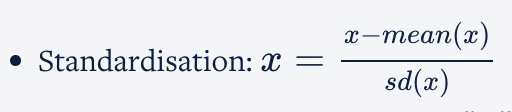

In [ ]:
standardize_numeric_data = (numeric_data-numeric_data.mean())/numeric_data.std()

In [ ]:
standardize_numeric_data.head()

In [ ]:
standardize_numeric_data.describe()

Concatinating the standardize_numeric_data with the categorical_data.

In [ ]:
df = pd.concat([standardize_numeric_data, categorical_data], axis = 1)

In [ ]:
df.info()

Removing the Current loan entirs from the response variable loan_status of the dataframe as the current .

In [ ]:
df = df[df['loan_status'] != 'Current']

In [ ]:
def cat_var_count(var_name):
  s = df[var_name].value_counts().head(10)
  print (s)
  plt.figure(figsize=(8,6))
  ax=s.plot.bar(width=.8) 
  for i, v in s.reset_index().iterrows():
    ax.text(i, v[var_name], v[var_name], color='black',ha="center",  va='bottom')
  plt.show()  


Converting categorical variables into numeric variables using dummy variables.

In [ ]:
# Encoding Charged Off as 1 and Fully Paid as 0:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

Checking if the dataset is is balanced in terms of the response valiab

In [ ]:
def cat_var_count(var_name):
  s = df[var_name].value_counts().head(10)
  print (s)
  plt.figure(figsize=(8,6))
  ax=s.plot.bar(width=.8) 
  for i, v in s.reset_index().iterrows():
    ax.text(i, v[var_name], v[var_name], color='black',ha="center",  va='bottom')
  plt.show()  


In [ ]:
cat_var_count('loan_status')

In [ ]:
Y = df['loan_status']

In [ ]:
Y.unique()

So as you can see the dataset is unbalanced. In order to balance the dataset we use SMOTE. Before doing this let us convert all the categorical variables into numeric variables by creating dummy variables.

In [ ]:
cat_list = ['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'mths_since_last_delinq']

In [ ]:
df1 = pd.get_dummies(df, columns=cat_list,
               drop_first=True, prefix=cat_list)

In [ ]:
df1.head()

In [ ]:
df1.describe()

In [ ]:
df1.dtypes

# Synthetic Minority Oversampling Technique (SMOTE)

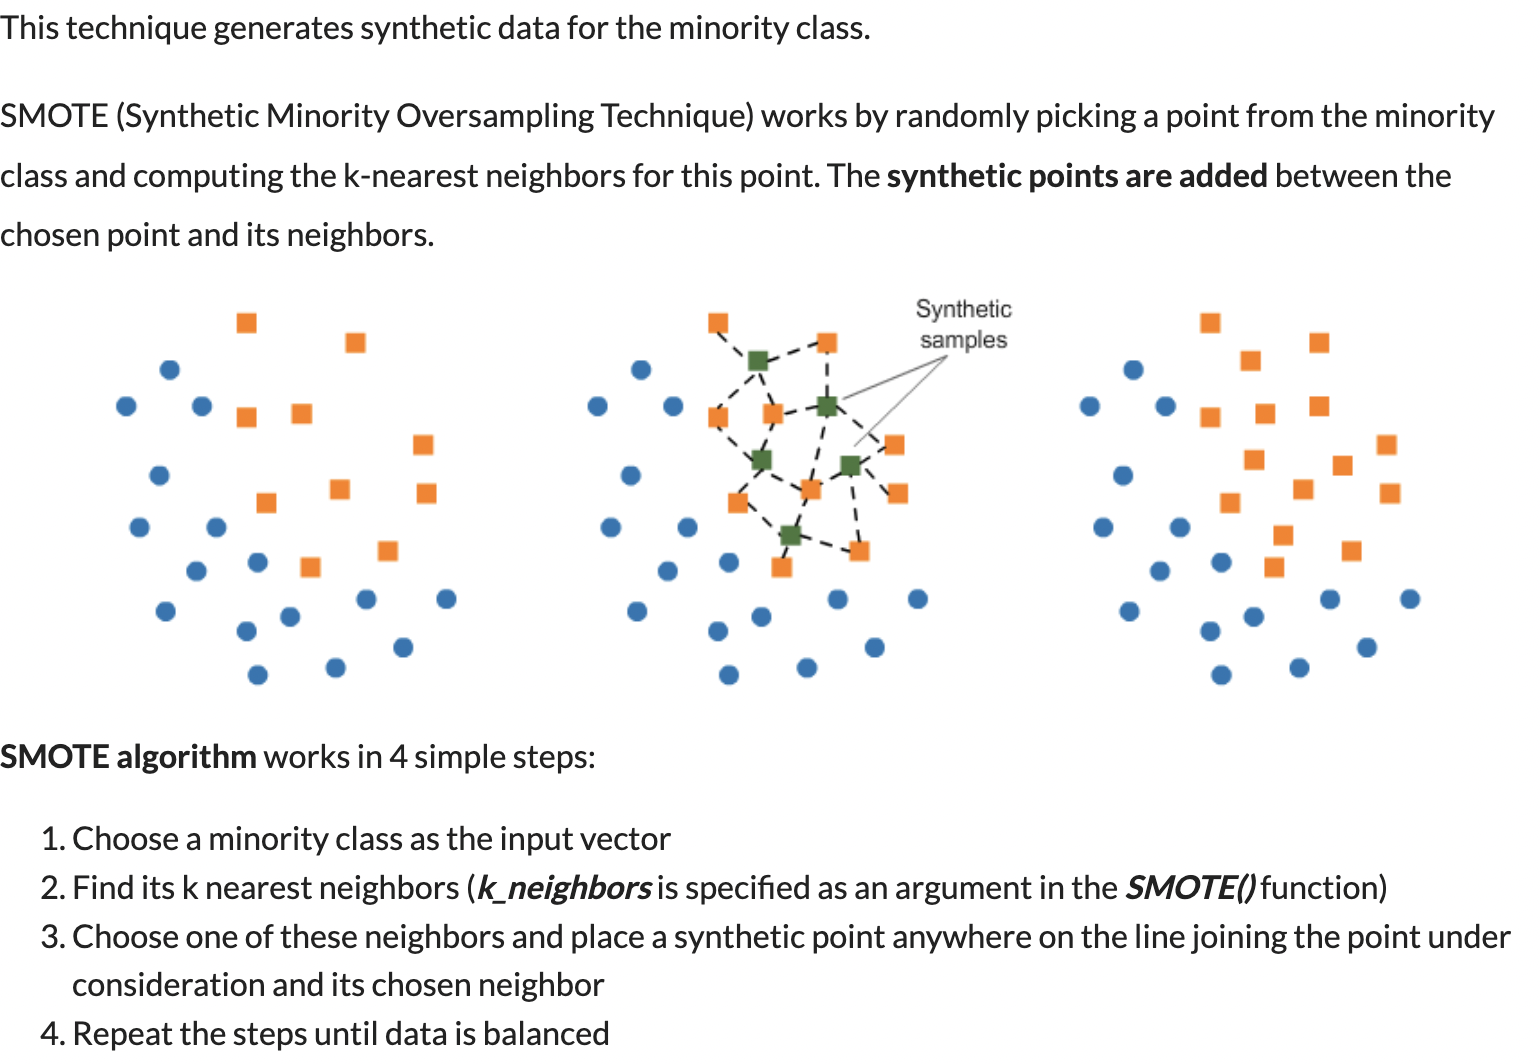

In [ ]:
'loan_status' in df1

In [ ]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter
X = df1
X = X.drop(['loan_status'],axis =1)
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Since the dataset is now balanced we can go ahead and split the data into training and testing splits.

In [ ]:
x_smote.to_csv (r'/content/drive/MyDrive/FinalProject/x_smote.csv', index = None, header=True)
y_smote.to_csv (r'/content/drive/MyDrive/FinalProject/y_smote.csv', index = None, header=True) 
X.to_csv (r'/content/drive/MyDrive/FinalProject/X_model.csv', index = None, header=True) 
Y.to_csv (r'/content/drive/MyDrive/FinalProject/Y_model.csv', index = None, header=True) 

## Spltting the data into train and test splits:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, train_size=0.8,test_size=0.2,random_state=100)

# Model Building:

## Logistic regression:<br>
To build the logistic regression model in python, we will use the library  - ***statsmodels and sklearn***. In statsmodels, displaying the statistical summary of the model is easier, such as the significance of coefficients (p-value), the coefficients themselves, etc., which is not so straightforward in sklearn. 

 

On the other hand, sklearn comes with some really useful methods such as ***recursive feature elimination (RFE)***. Thus, we'll use a combination of both the libraries.

 

In [ ]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In the above table the coeff gives the coefficients of attributes and the p values tells us if a particular value is significant or not.

### Feature Selection

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Analyzing the correlation between the features by using Pearsons Correlation:
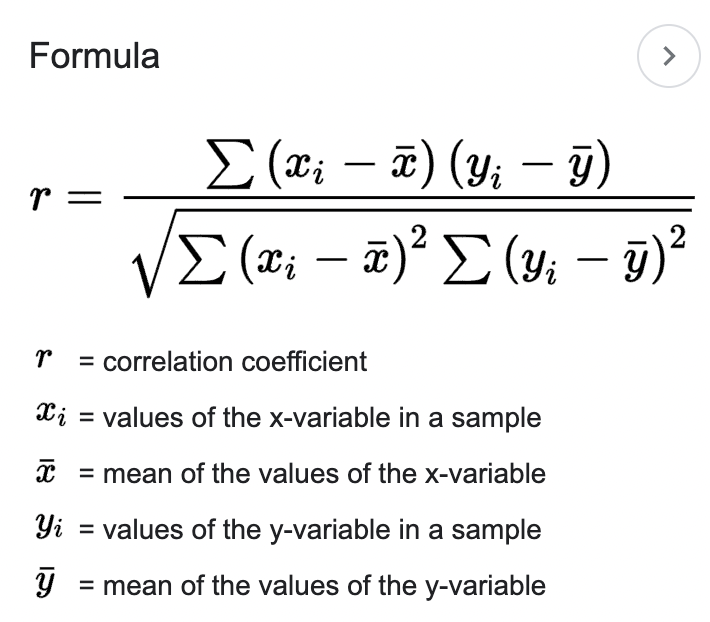

In [ ]:
# Create correlation matrix
corr_matrix = X_train.corr('pearson').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
# Features that are highly correlated:
to_drop

In [ ]:
# Dropping the highly correlated features from X_train and X_test
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

In [ ]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

Removing feature one by one based on their p-values is a tedious process so we use Recursive feature elimination(RFE). Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=80)             # running RFE with 80 variables as input
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

In [ ]:
# Variables selected by RFE:
col_80 = X_train.columns[rfe.support_]
print(col_80)

In [ ]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col_80])), family = sm.families.Binomial())
logm4.fit().summary()

**Detecting Multicollinearity with VIF**:
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :<br>
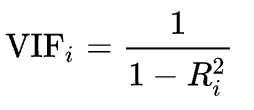<br>
**where**<br>
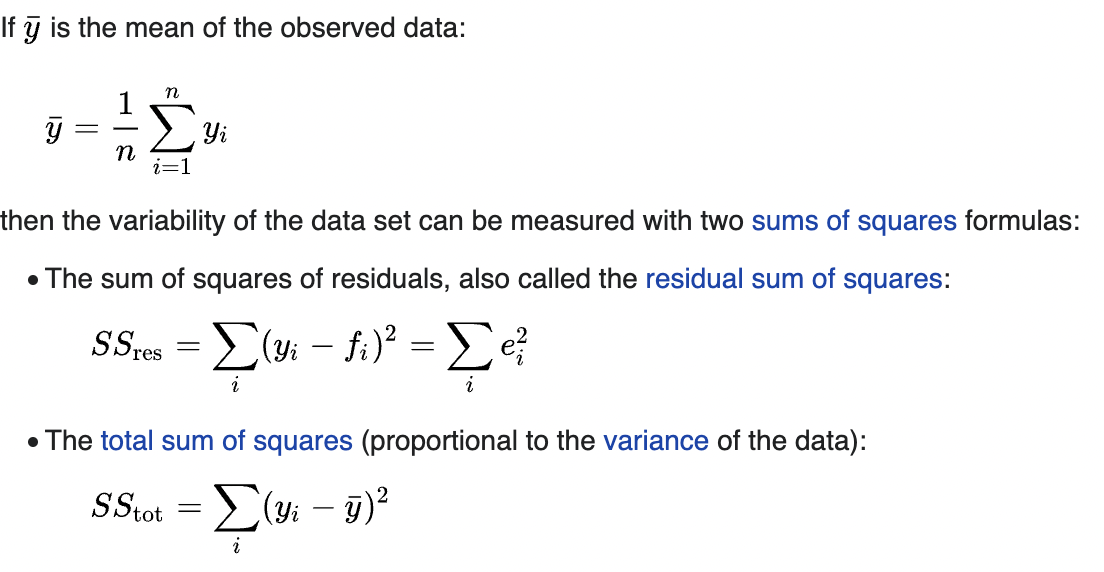

In [ ]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [ ]:
pd.concat([X_train[col_80],y_train],axis=1).columns

In [ ]:
# Calculating Vif value
vif_cal(input_data=pd.concat([X_train[col_80],y_train],axis=1), dependent_col='loan_status')

In [ ]:
# Removing features with high p-value and VIF:
del_cols = ['sub_grade_E1','sub_grade_E2','sub_grade_E3','sub_grade_E4','sub_grade_E5','sub_grade_G2']
cols = [x for x in col_80 if x not in del_cols]


In [ ]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm5.fit().summary()

All the p-values is very low, close to zero. We cannot remove any features further without loosing any information.

In [ ]:
X_train = X_train[cols]

In [ ]:
X_test = X_test[cols]

In [ ]:
X_train.to_csv (r'/content/drive/MyDrive/FinalProject/X_train_logistic.csv', index = None, header=True) 
X_test.to_csv (r'/content/drive/MyDrive/FinalProject/X_test_logistic.csv', index = None, header=True) 
y_train.to_csv (r'/content/drive/MyDrive/FinalProject/y_train_logistic.csv', index = None, header=True) 
y_test.to_csv (r'/content/drive/MyDrive/FinalProject/y_test_logistic.csv', index = None, header=True) 

***Fitting Logistic Regression for selected features using sklearn***

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)


In [ ]:
# y_test_df = pd.DataFrame(y_test)

In [ ]:
y_pred_df = pd.DataFrame(y_test)

In [ ]:
y_pred_final = {'loan_status_test_actual':list(y_test),
                'probability_fully_paid_predicted': list(y_pred_df[0]),
                'probability_charged_off_predicted': list(y_pred_df[1])
                }

In [ ]:
y_pred_final = pd.DataFrame(y_pred_final)
y_pred_final.head()

In [ ]:
# Creating new column 'predicted_class' with 1 if probability_charged_off_predicted>0.5 else 0
y_pred_final['predicted'] = y_pred_final.probability_charged_off_predicted.map( lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_pred_final.head(10)

#### Logistic Regression Model Evaluation:

In [ ]:
from sklearn import metrics

In [ ]:
help(metrics.confusion_matrix)

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.loan_status_test_actual, y_pred_final.predicted )
confusion

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.loan_status_test_actual, y_pred_final.predicted)

We have obtained an accuracy of **97.71%** which is really good. 

In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

We have obtained an sensitivity of **96.41%** which is really good. 

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

***Sensitivity refers to a test's ability to designate a person who will charge off a loan as positive. A highly sensitive test means that there are few false negative results, and thus fewer cases of charged off loans are missed. The specificity of a test is its ability to designate an person who does charge off a loan as negative.***

In [ ]:
# Calculate false postive rate - predicting charged off when customer does not charge off a loan
print(FP/ float(TN+FP))

Very low almost close to zero. This again is a very good sign that our model is performing really well.

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

***Receiver Operating Characteristic Curve(ROC)***<br>
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

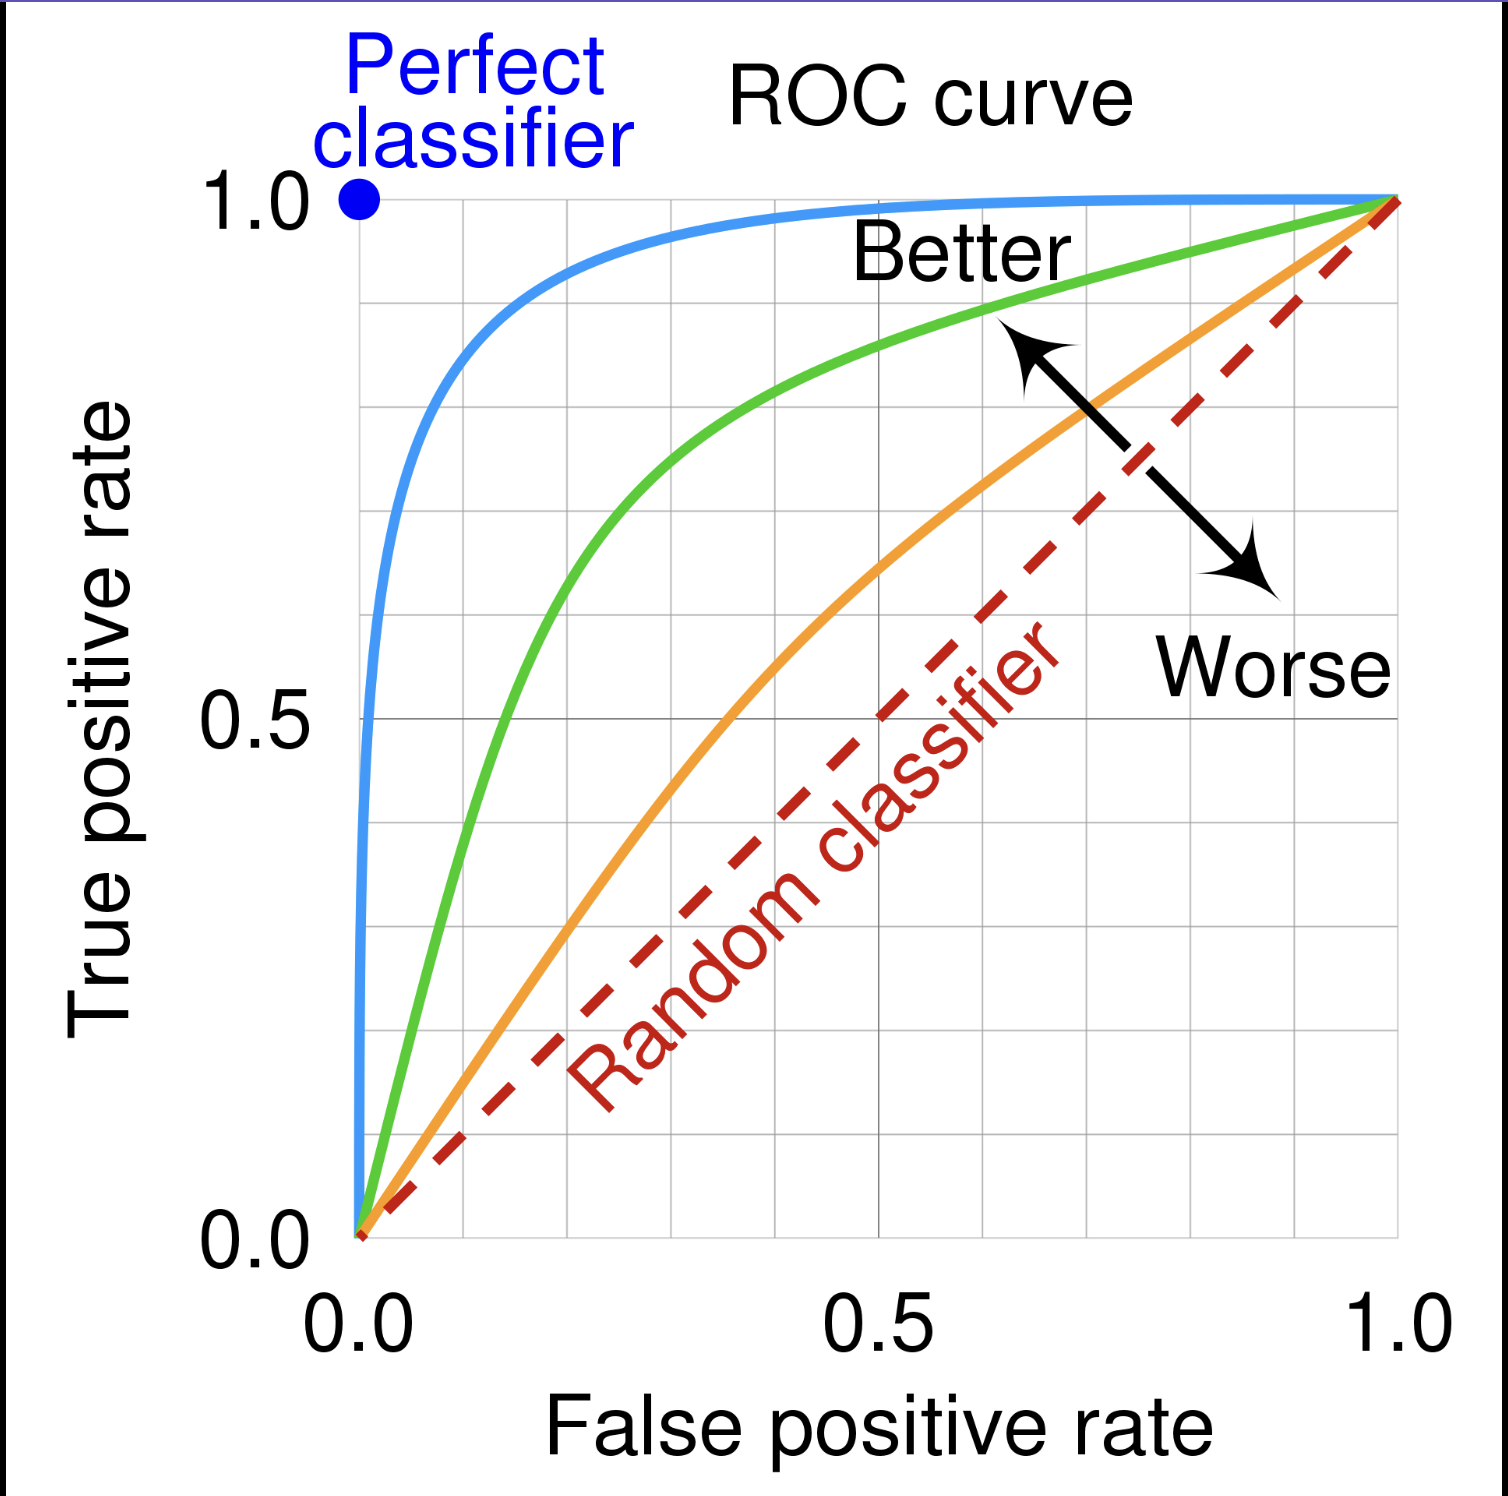

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
draw_roc(y_pred_final.loan_status_test_actual, y_pred_final.predicted)

***Area under the curve = 98%*** indicates that the model is performing phenominally. This concludes logistic regression.

## Simple Neural network  

In [ ]:
X_train.shape , y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X_train = torch.from_numpy(X_train.values)
X_test = torch.from_numpy(X_test.values)
y_train = torch.from_numpy(y_train.values)
y_test = torch.from_numpy(y_test.values)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
     
        self.fc1 = nn.Linear(74, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
        self.m = nn.Sigmoid()
    def forward(self, x):
      
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.m(x)
        return x


net = Net()
print(net)

In [ ]:
losses = []
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
for epoch in range(50):
    pred_y = net(X_train.float())
    loss = loss_function(pred_y, y_train.float().reshape(-1,1))
    losses.append(loss.item())

    net.zero_grad()
    loss.backward()

    optimizer.step()
    print(loss)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(0.1))
plt.show()


In [ ]:
losses = []
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
for epoch in range(500):
    pred_y = net(X_train.float())
    loss = loss_function(pred_y, y_train.float().reshape(-1,1))
    losses.append(loss.item())

    net.zero_grad()
    loss.backward()

    optimizer.step()
    # print(loss)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(0.1))
plt.show()
